In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# 1. Load your Lenna image
image_path = r"C:\Users\LENOVO\Downloads\Lenna_(test_image).png"
image = Image.open(image_path)

In [3]:
# 2. Convert to grayscale
gray_image = image.convert('L')
original_matrix = np.array(gray_image, dtype=float)

In [4]:
# 3. Perform SVD
print("Performing SVD on 512×512 image...")
U, S, VT = np.linalg.svd(original_matrix, full_matrices=False)

Performing SVD on 512×512 image...


In [5]:
# 4. Reconstruction function
def reconstruct_svd(U, S, VT, k):
    """Reconstruct using top k singular values"""
    # Select first k components
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    
    # Reconstruct
    reconstructed = U_k @ S_k @ VT_k
    
    # Ensure valid pixel range
    reconstructed = np.clip(reconstructed, 0, 255)
    
    return reconstructed.astype(np.uint8)


In [6]:
# 5. Reconstruct for different k values
k_values = [5, 20, 50, 100]
reconstructions = []

for k in k_values:
    print(f"Reconstructing with k={k}...")
    recon = reconstruct_svd(U, S, VT, k)
    reconstructions.append(recon)

Reconstructing with k=5...
Reconstructing with k=20...
Reconstructing with k=50...
Reconstructing with k=100...


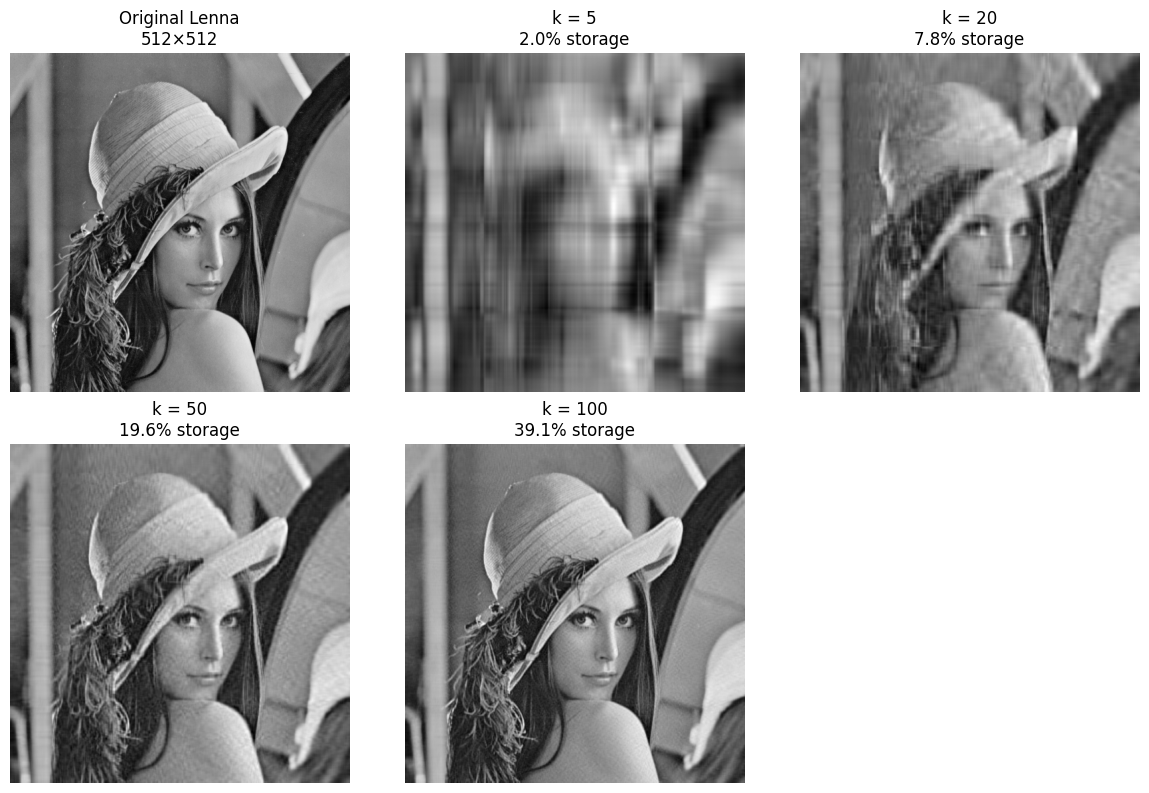

In [7]:
# 6. Visualize results
plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title(f'Original Lenna\n512×512')
plt.axis('off')

# Reconstructions
for i, (k, recon) in enumerate(zip(k_values, reconstructions)):
    plt.subplot(2, 3, i+2)
    plt.imshow(recon, cmap='gray')
    
    # Calculate compression ratio
    m, n = original_matrix.shape
    original_size = m * n
    compressed_size = k * (m + n + 1)  # U_k: m×k, S_k: k, V_k^T: k×n
    ratio = compressed_size / original_size * 100
    
    plt.title(f'k = {k}\n{ratio:.1f}% storage')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# 7. Print statistics
print("\n=== Lenna Image SVD Statistics ===")
print(f"Total singular values: {len(S)}")
print(f"First 10 singular values: {S[:10]}")

# Energy captured by top k singular values
total_energy = np.sum(S**2)
for k in k_values:
    energy = np.sum(S[:k]**2)
    percentage = (energy / total_energy) * 100
    print(f"k={k}: Captures {percentage:.2f}% of total energy")



=== Lenna Image SVD Statistics ===
Total singular values: 512
First 10 singular values: [64735.2381916  10596.25842534  8175.42321092  6475.36025946
  5883.4636034   5552.65664525  4588.05230214  4093.19826913
  3375.16338824  3173.07956748]
k=5: Captures 95.95% of total energy
k=20: Captures 98.92% of total energy
k=50: Captures 99.65% of total energy
k=100: Captures 99.90% of total energy


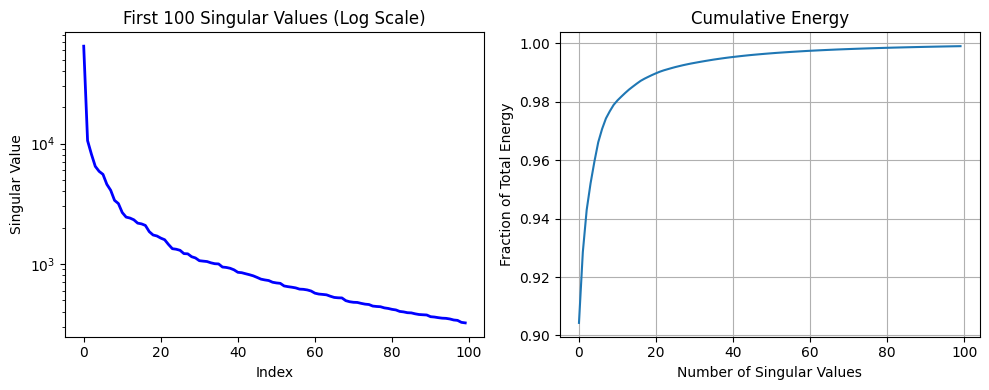

In [9]:
# Plot singular value spectrum
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.semilogy(S[:100], 'b-', linewidth=2)
plt.title('First 100 Singular Values (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Singular Value')

plt.subplot(1, 2, 2)
cumulative_energy = np.cumsum(S**2) / total_energy
plt.plot(cumulative_energy[:100])
plt.title('Cumulative Energy')
plt.xlabel('Number of Singular Values')
plt.ylabel('Fraction of Total Energy')
plt.grid(True)

plt.tight_layout()
plt.show()